In [1]:
import pandas as pd
df3 = pd.read_csv('df2.csv')

In [2]:
import numpy as np
df3['delayed'] = np.where(df3['delay_sum']>15, 1, 0) #created a new column such that 1 indicates a delayed flight, 0 indicates an on-time flight
df3.head()

,depdelay,arrdelay,nonhubairportorigin,smallhubairportorigin,mediumhubairportorigin,largehubairportorigin,nonhubairportdest,smallhubairportdest,mediumhubairportdest,largehubairportdest,...,windspeed,windspeedsquare,windgustdummy,windgustspeed,raindummy,raintracedummy,snowdummy,snowtracedummy,delay_sum,delayed
0,0,-4.0,1,0,0,0,1,0,0,0,...,10.300000,106.090000,0,0.0,0,0,0,0,-4.0,0
1,-4,11.0,0,0,0,1,0,1,0,0,...,13.666667,186.777778,0,0.0,0,0,0,0,7.0,0
2,3,12.0,0,0,0,1,0,0,1,0,...,13.528302,183.014952,0,0.0,0,0,0,0,15.0,0
3,-3,24.0,0,0,1,0,0,0,0,1,...,0.000000,0.000000,0,0.0,1,0,0,0,21.0,1
4,0,-8.0,0,0,0,1,1,0,0,0,...,7.666667,58.777778,0,0.0,0,0,0,0,-8.0,0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import pandas as pd 
X = df3.drop('delayed', axis = 1)
y = df3.delayed



## I've assigned X to every category from this dataset other than the target variable, i.e. the 'delayed' column; I've assigned y as the target variable which is the aforementioned column. In my case, I want to find a discrete label (i.e. 1 for a delayed flight, and 0 for an on-time flight). As such, I will explore different classification metrics, namely Decision Trees, Logistic Regression and Random Forest:

# Decision Tree

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

In [6]:
    X, y = make_classification(n_samples = 1201664,
                               n_features = 3,
                               n_informative = 3,
                               n_redundant = 0,
                               n_classes = 2,
                               random_state = 42)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
    dec_tree = DecisionTreeClassifier()

    print(cross_val_score(dec_tree, X, y, scoring="f1", cv = 7))
    mean_score = cross_val_score(dec_tree, X, y, scoring="f1", cv = 7).mean()
    std_score = cross_val_score(dec_tree, X, y, scoring="f1", cv = 7).std()
    print(mean_score)
    print(std_score)

[0.91974648 0.91990721 0.92017383 0.92004334 0.91939399 0.92024069
 0.91996653]
0.9198126536400936
0.00026367534759847913


In [10]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[109940   9852]
 [  9673 110868]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92    119792
           1       0.92      0.92      0.92    120541

    accuracy                           0.92    240333
   macro avg       0.92      0.92      0.92    240333
weighted avg       0.92      0.92      0.92    240333



# Logistic Regression

In [13]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [14]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[105868,  13924],
       [ 15214, 105327]], dtype=int64)

In [15]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

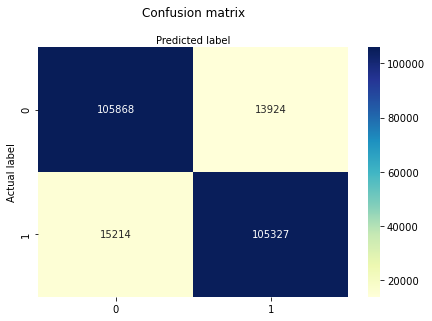

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [17]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1-Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.878759887323006
Precision: 0.8832378764119379
Recall: 0.8737856828796841
F1-Score: 0.878486354840862


# Random Forest

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
from sklearn import datasets

In [19]:
print(f"Train Data: {X_train.shape}, {y_train.shape}")
print(f"Test Data: {X_test.shape}, {y_test.shape}")

# Training a binary classifier using Random Forest Algorithm with default hyperparameters
classifier = RandomForestClassifier(random_state=18)
classifier.fit(X_train, y_train)

# Here X_test, y_test are the test data points
predictions = classifier.predict(X_test)

Train Data: (961331, 3), (961331,)
Test Data: (240333, 3), (240333,)


[[112944   6848]
 [  6816 113725]]


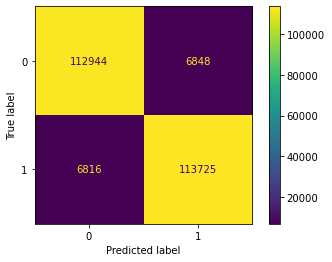

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion_matrix funnction a matrix containing the summary of predictions
print(confusion_matrix(y_test, predictions))

# plot_confusion_matrix function is used to visualize the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test)
plt.show()

In [21]:
# Importing all necessary libraries
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, predictions)}")
print(f"Accuracy of the classifier is: {accuracy_score(y_test, predictions)}")
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, predictions)}")

# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, predictions)}")

Precision Score of the classifier is: 0.9432045316944921
Accuracy of the classifier is: 0.9431455522129711
Recall Score of the classifier is: 0.9434549240507379
F1 Score of the classifier is: 0.9433297112569158


# Findings

##  Decision Tree
### Runtime: 9:57; Precision: 91.78%; Recall: 91.91%; F1-Score: 91.84%;  Accuracy: 91.88%
##  Logistic Regression
### Runtime: instantaneous; Precision: 88.32%; Recall: 87.38%; F1-Score: 87.85%; Accuracy: 87.88%
## The Random Forest 
### Runtime: 12:02; Precision 94.32%; Recall: 94.35%; F1-Score: 94.33%; Accuracy: 94.32%


#### The Random Forest yields the highest results in all 4 categories, but with a significantly longer runtime than the other two models. The Logistic Regression's results were 3 to 6 percent less than the other two, but executed 597 times and 722 times faster than the Decision Tree and Random Forest, respectively.